<a href="https://colab.research.google.com/github/spps-supalerk/OCR/blob/main/OCR_ggVision_Pytesseract_Easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect Google Drive

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Import main library

In [2]:
import pandas as pd
import time

from google.colab.patches import cv2_imshow
import cv2

# Example picture

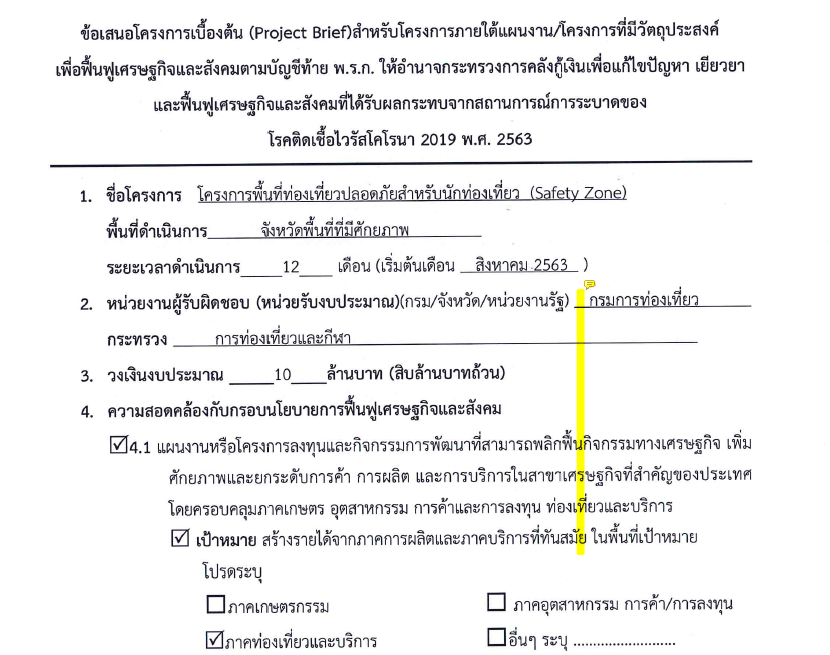

In [3]:
your_pic_path = '/content/drive/My Drive/ThaiME/ex_thaime_pic.png'
ex_pic = cv2.imread(your_pic_path)
cv2_imshow( ex_pic)

# Google vision

In [4]:
# Install Google Vision
# For more information about google vision api go check link below
# https://cloud.google.com/vision/?utm_source=google&utm_medium=cpc&utm_campaign=japac-TH-all-en-dr-bkws-all-super-trial-e-dr-1009137&utm_content=text-ad-none-none-DEV_c-CRE_256563263658-ADGP_Hybrid+%7C+AW+SEM+%7C+BKWS+~+T1+%7C+EXA+%7C+ML+%7C+1:1+%7C+TH+%7C+en+%7C+Vision+%7C+google+vision-KWID_43700030970627911-kwd-15026601681&userloc_1012728-network_g&utm_term=KW_google%20vision&gclid=CjwKCAjwtNf6BRAwEiwAkt6UQtRb4cyVUGPq25EshVR4Q8tDtuHS9AGFmY96KYcO75FdZ_C9Pbt2kBoCgNYQAvD_BwE
!pip install --upgrade google-cloud-vision

Requirement already up-to-date: google-cloud-vision in /usr/local/lib/python3.6/dist-packages (1.0.0)


In [5]:
# import libraries for google vision
from google.cloud import vision
import os, io
# read file which contain authorized & enable google vision api
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'/YOUR_API_PATH.json'

In [6]:
def detect_text(path):
    """Detects text in the file."""
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    output = ' '.join([word.description for word in texts])
    return output

In [7]:
# start time
start = time.time()

# get text using google vision ai
text = detect_text(your_pic_path)

# stop time
end = time.time()

print(f'{"-"*50} \nMethod : google vision ai \ntime : {end-start:.3f} sec \n {"-"*50}' )
print(text)

-------------------------------------------------- 
Method : google vision ai 
time : 1.007 sec 
 --------------------------------------------------
ข้อเสนอโครงการเบื้องต้น (Project Brief)สำหรับโครงการภายใต้แผนงาน/โครงการที่มีวัตถุประสงค์
เพื่อฟื้นฟูเศรษฐกิจและสังคมตามบัญชีท้าย พ.ร.ก. ให้อำนาจกระทรวงการคลังกู้เงินเพื่อแก้ไขปัญหา เยียวยา
และฟื้นฟูเศรษฐกิจและสังคมที่ได้รับผลกระทบจากสถานการณ์การระบาดของ
โรคติดเชื้อไวรัสโคโรนา 2019 พ.ศ. 2563
1. ชื่อโครงการ โครงการพื้นที่ท่องเที่ยวปลอดภัยสำหรับนักท่องเที่ยว (Safety Zone)
พื้นที่ดำเนินการ
จังหวัดพื้นที่ที่มีศักยภาพ
ระยะเวลาดำเนินการ
เดือน (เริ่มต้นเดือนสิงหาคม 2563 )
12
2. หน่วยงานผู้รับผิดชอบ (หน่วยรับงบประมาณ)(กรม/จังหวัด/หน่วยงานรัฐ) กรมการท่องเที่ยว
กระทรวง
การท่องเที่ยวและกีฬา
3. วงเงินงบประมาณ
10
ล้านบาท (สิบล้านบาทถ้วน)
4. ความสอดคล้องกับกรอบนโยบายการฟื้นฟูเศรษฐกิจและสังคม
M4.1 แผนงานหรือโครงการลงทุนและกิจกรรมการพัฒนาที่สามารถพลิกฟื้นกิจกรรมทางเศรษฐกิจ เพิ่ม
ศักยภาพและยกระดับการค้า การผลิต และการบริการในสาขาเศรษฐกิจที่สำคัญของประเทศ
โ

# Pytesseract

In [8]:
# install pytesseract (include Thai language)
!sudo apt install tesseract-ocr-tha
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-tha is already the newest version (4.00~git24-0e00fe6-1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [9]:
# import libraries for pytesseract
import pytesseract
from PIL import Image

In [10]:
# start time
start = time.time()

# get text using pyteesseract
text = pytesseract.image_to_string(Image.open(your_pic_path), lang = 'tha')

# stop time
end = time.time()

print(f'{"-"*50} \nMethod : Pytersseract \ntime : {end-start:.3f} sec \n {"-"*50}' )
print(text)


-------------------------------------------------- 
Method : Pytersseract 
time : 4.531 sec 
 --------------------------------------------------
ณั้ว                  จคงเจ                         5                 ซ่                      5,

ข้อเสนอโครงการเบื่องต้น (61๐|@๕5 8ท่อกสําหรับโครงการภายใต้แผนงาน/โครงการที่มีวัตถุประสงค์

เพื่อฟื้นฟูเศรษฐกิจและสังคมตามบัญชีท้าย พ.ร.ก. ให้อํานาจกระทรวงการคลังกู้เงินเพื่อแก้ไขปัญหา เยียวยา
และฟื้นฟูเศรษฐกิจและสังคมที่ได้รับผลกระทบจากสถานการณ์การระบาดของ

โรคติดเชื้อไวรัสโคโรนา 2019 พ.ศ. 2563

 

1 ชื่อโครงการ โครงการพื้นที่ท่องเที่ยวปลอดภัยสําหรับนักท่องเที่ยว (5ล1๑๒ 7๐ก@)
ง  1จ้โจ       ซึจจอรักจ้งเซี่งี่ก๕,
พื้นที่ดําเนินการ.           จังหวัดพื้นที่ที่มีศักยภาพ
ระยะเวลาดําเนินการ 12 เดือน(เริ่มต้นเดือน สิงหาคม .2563 )

2. หน่วยงานผู้รับผิดชอบ (หน่วยรับงบประมาณ)(กรม/จังหวัด/หน่วยงานรัฐ)

 

กระทรวง   การท่องเที่ยวและกีฬา
3. วงเงินงบประมาณ     10 ล้านบาท (สิบล้านบาทถ้วน)
4. ความสอดคล้องกับกรอบนโยบายการฟื้นฟูเศรษฐกิจและสังคม

[ที4.1 แผนงานหรือโ

# Easyocr

In [11]:
!pip install git+git://github.com/jaidedai/easyocr.git

  Cloning git://github.com/jaidedai/easyocr.git to /tmp/pip-req-build-pmekr2mk
  Running command git clone -q git://github.com/jaidedai/easyocr.git /tmp/pip-req-build-pmekr2mk
  Created wheel for easyocr: filename=easyocr-1.1.9-cp36-none-any.whl size=48400900 sha256=efe6d5d191a349125cd5dc82af440e2a4fa5374eb9fc31a393a1ddef621c88c6
  Stored in directory: /tmp/pip-ephem-wheel-cache-tq5yjr07/wheels/e8/77/61/a2618f4b50cdf417e0f3fd201f9814addc89e429bf05103fb3
Successfully built easyocr


In [12]:
import easyocr
reader = easyocr.Reader(['th','en']) # need to run only once to load model into memory

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [13]:
# start time
start = time.time()

# get text using easyocr
text = reader.readtext(your_pic_path)

# stop time
end = time.time()

print(f'{"-"*50} \nMethod : easyocr \ntime : {end-start:.3f} sec \n {"-"*50}' )
print(text)


-------------------------------------------------- 
Method : easyocr 
time : 204.823 sec 
 --------------------------------------------------
[([[78, 13], [722, 13], [722, 44], [78, 44]], 'ข้อเสนอโครงการเบื้องต้น (project brief) สำหรับโครงการภายใต้แผนงาน/โครงการที่มีวัตถุประสงค์', 0.0001800492318579927), ([[50, 49], [751, 49], [751, 87], [50, 87]], 'เพื่อฟื้นฟูเศรษฐกิจและสังคมตามบัญชีท้าย พ.ร.ก. ให้อำนาจกระทรวงการคลังกู้เงินเพื่อแก้ไขปัญหา เยียวยา', 0.00043430677033029497), ([[149, 87], [649, 87], [649, 119], [149, 119]], 'และฟื้นฟูเศรษฐกิจและสังคมที่ได้รับผลกระทบจากสถานการณ์การระบาดของ', 0.010869257152080536), ([[263, 120], [536, 120], [536, 153], [263, 153]], 'โรคติดเชื้อไวรัสโคโรนา 2019 พ.ศ. 2563', 0.01754196733236313), ([[102, 178], [630, 178], [630, 206], [102, 206]], 'ชื่อโครงการ  โครงการพื้นที่ท่องเที่ยวปลอดภัยสำหรับนักท่องเที่ยว _ safety zone)', 4.922628249914851e-06), ([[255, 210], [414, 210], [414, 242], [255, 242]], '_จังหวัดพื้นที่ที่มีศักยภาพ', 0.2307005077600479), ([[102,